## Edgar Moises Hernandez-Gonzalez
### 11/12/19-17/12/19
### Clasificar Mnist con ConvLSTM2D

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 60000
n_samples_test : 10000


In [0]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 10


In [0]:
#convertir a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#escalar los valores en un rango de 0 a 1 (normalizar)
x_train /= 255.0
x_test /= 255.0

In [0]:
#convertir de 3D a 4D
x_train = x_train.reshape((n_samples_train, 1, 28, 28, 1))
x_test = x_test.reshape((n_samples_test, 1, 28, 28, 1))

print(x_train.shape)
print(x_test.shape)

(60000, 1, 28, 28, 1)
(10000, 1, 28, 28, 1)


In [0]:
model = Sequential()
model.add(ConvLSTM2D(32, (3,3), activation='relu', input_shape=(1,28,28,1)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 26, 26, 32)        38144     
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1384512   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 1,423,306
Trainable params: 1,423,306
Non-trainable params: 0
______________________________________________

In [0]:
history = model.fit(x_train, y_train, epochs = 5, validation_data=(x_test, y_test)) #batch_size = 32 (por defecto)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 40s 665us/sample - loss: 0.2369 - acc: 0.9295 - val_loss: 0.0727 - val_acc: 0.9771
Epoch 2/5
60000/60000 [==============================] - 36s 600us/sample - loss: 0.0890 - acc: 0.9723 - val_loss: 0.0547 - val_acc: 0.9830
Epoch 3/5
60000/60000 [==============================] - 36s 597us/sample - loss: 0.0670 - acc: 0.9790 - val_loss: 0.0501 - val_acc: 0.9826
Epoch 4/5
60000/60000 [==============================] - 36s 594us/sample - loss: 0.0510 - acc: 0.9835 - val_loss: 0.0501 - val_acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 36s 596us/sample - loss: 0.0424 - acc: 0.9858 - val_loss: 0.0532 - val_acc: 0.9840


In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 234us/sample - loss: 0.0532 - acc: 0.9840
Test loss: 0.05315624231942129
Test accuracy: 0.984


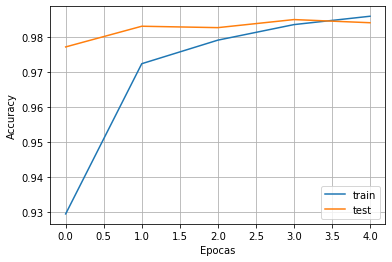

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

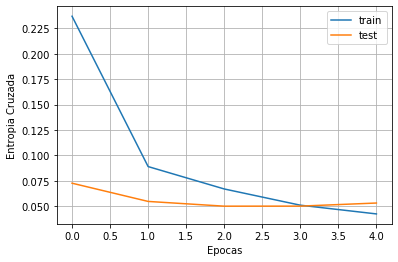

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()

In [0]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [0]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[ 974    1    1    0    0    0    2    1    1    0]
 [   0 1125    2    2    0    0    3    1    2    0]
 [   1    1 1011    0    1    0    0   11    7    0]
 [   0    0    2  995    0    7    0    2    4    0]
 [   1    0    1    0  971    0    1    0    1    7]
 [   2    0    0    3    0  882    4    0    1    0]
 [   7    2    0    0    3    5  938    0    3    0]
 [   1    3    7    0    0    0    0 1010    4    3]
 [   4    0    2    0    1    0    0    6  960    1]
 [   3    4    0    3    7    6    0    6    6  974]]


In [0]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



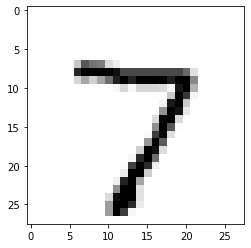

In [0]:
plt.imshow(x_test[0].reshape(28,28), cmap='Greys')
plt.show()

In [0]:
prediccion = model.predict(x_test[0].reshape(1,28,28,1))
print(prediccion.argmax())

ValueError: ignored